# Model Deployment 
This notebook is a continuation of the notebook *"which_car_body_style_is_it.ipynb"*. Here, the model created in the original notebook is imported and used to classify any user-defined image. The notebook is converted into a web application using the **HuggingFace API** and **Gradio**. The model file *bd_design.pkl* must be present in the working directory for succesful import.

In [1]:
# Importing the fast.ai library
from fastbook import *

## -- THIS STEP IS NECESSARY ONLY WHEN NOTEBOOK IS BEING EXECUTED ON WINDOWS LOCALLY -- ##
# Redefining to Windows Path
import pathlib
plt = platform.system()
if plt == 'Windows': pathlib.PosixPath = pathlib.WindowsPath

In [2]:
# Importing the learner from directory
learn = load_learner('bd_design.pkl')

In [3]:
# defining prediction function
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {pred: round(float(probs[pred_idx]),3)}

In [4]:
# Path for test file
Path().ls()[2]

Path('bmw_conv.jpg')

In [5]:
# Check
test_image = Path().ls()[2]
predict(test_image)

{'Convertible': 0.978}

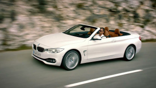

In [6]:
# test file - preview
Image.open(test_image).to_thumb(156)

### Adding some examples for image uploading

In [7]:
van = Path().ls(file_exts='.jpg')[3]
hatchback = Path().ls(file_exts='.jpg')[1]
convertible = Path().ls(file_exts='.jpg')[0]
pickup_truck = Path().ls(file_exts='.jpg')[4]

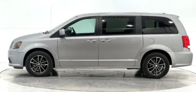

In [8]:
Image.open(van).to_thumb(196)

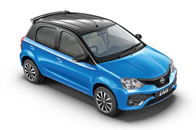

In [9]:
Image.open(hatchback).to_thumb(196)

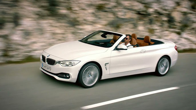

In [10]:
Image.open(convertible).to_thumb(196)

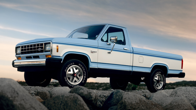

In [11]:
Image.open(pickup_truck).to_thumb(196)

### Using Gradio
**Gradio** must be installed. Only *.jpg* or *.jpeg* images work for this classifier.

In [12]:
#!pip install gradio

In [13]:
# Importing fastai.vision
from fastai.vision.all import *

# Importing gradio
import gradio as gr

In [14]:
# Running on a local server

image = gr.Image(width=512, height=285)
label = gr.Label()
examples=[van, hatchback, convertible, pickup_truck]
title = "Car Body Design Detector"
desc = "Design Categories: Van, Pickup Truck, Convertible, Hatchback"
long_desc = "After Uploading Image, Click Submit to detect. For any uploaded car image, this application can detect whether the design is any of these 4 styles: Van, Pickup Truck, Convertible or Hatchback. Alternatively it can specify which of the 4 designs is most similar to the actual design of the uploaded car. The app uses a pre-trained resnet18 model and can be used by anyone with an interenet connection (share the URL)."

intf = gr.Interface(fn=predict, inputs=image, outputs=label, description=desc, article=long_desc, title=title, examples=examples)
intf.launch(inline=False, share=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


The locally deployed model will automatically shutdown after 72 hours or when the kernel is stopped. To deploy the same model publicly, the <u>share</u> argument of *intf.launch* can be set to **True**. The output will provide both local and public links for this application.

### To Conclude
All steps for model deployment are not contained in the notebook because setting-up HuggingFace API and pushing app files through **Git** is also required. However, this notebook provides an outline for how the <u>Car Design Detector</u> application was deployed.